In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

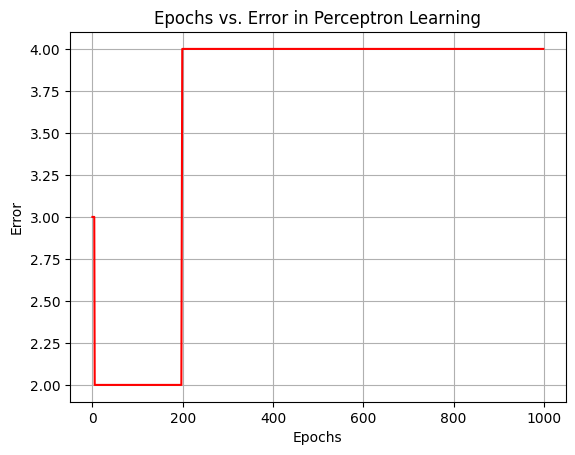

Final weights: [1.00000000e-01 1.38777878e-17]


In [12]:

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize weights
W = np.array([10, 0.2])

# Learning rate
alpha = 0.05

# Number of epochs
max_epochs = 1000

# Initialize lists to store error and epoch values for plotting
error_values = []
epoch_values = []

# Step activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Training loop
for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(X)):
        # Compute the predicted output
        net_input = np.dot(X[i], W)
        y_pred = step_function(net_input)

        # Compute the error
        error = y[i] - y_pred
        total_error += error ** 2

        # Update weights
        delta = alpha * error
        W += delta * X[i]

    # Store error and epoch values for plotting
    error_values.append(total_error)
    epoch_values.append(epoch)

    # Check for convergence
    if total_error == 0:
        break

# Plot epochs vs. error
plt.plot(epoch_values, error_values, color = 'r')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in Perceptron Learning')
plt.grid()
plt.show()

# Print the final weights
print("Final weights:", W)


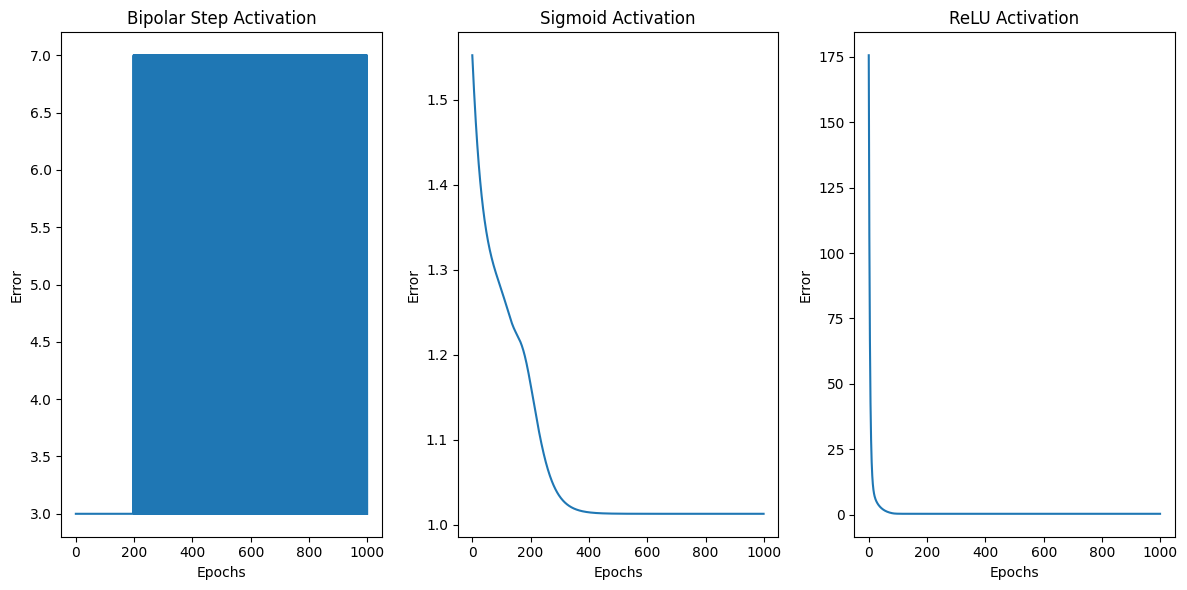

Final weights (Bipolar Step): [1.00000000e-01 1.38777878e-17]
Final weights (Sigmoid): [0.01686915 0.01674429]
Final weights (ReLU): [0.34482759 0.34482759]


In [14]:
W_bipolar = np.array([10, 0.2])
W_sigmoid = np.array([10, 0.2])
W_relu = np.array([10, 0.2])

error_values_bipolar = []
epoch_values_bipolar = []

error_values_sigmoid = []
epoch_values_sigmoid = []

error_values_relu = []
epoch_values_relu = []

# Activation functions
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Training loop
for epoch in range(max_epochs):
    total_error_bipolar = 0
    total_error_sigmoid = 0
    total_error_relu = 0

    for i in range(len(X)):
        # Compute the predicted outputs for each activation function
        net_input_bipolar = np.dot(X[i], W_bipolar)
        y_pred_bipolar = bipolar_step_function(net_input_bipolar)

        net_input_sigmoid = np.dot(X[i], W_sigmoid)
        y_pred_sigmoid = sigmoid_function(net_input_sigmoid)

        net_input_relu = np.dot(X[i], W_relu)
        y_pred_relu = relu_function(net_input_relu)

        # Compute the errors
        error_bipolar = y[i] - y_pred_bipolar
        error_sigmoid = y[i] - y_pred_sigmoid
        error_relu = y[i] - y_pred_relu

        # Update weights for each activation function
        delta_bipolar = alpha * error_bipolar
        delta_sigmoid = alpha * error_sigmoid
        delta_relu = alpha * error_relu

        W_bipolar += delta_bipolar * X[i]
        W_sigmoid += delta_sigmoid * X[i]
        W_relu += delta_relu * X[i]

        total_error_bipolar += error_bipolar ** 2
        total_error_sigmoid += error_sigmoid ** 2
        total_error_relu += error_relu ** 2

    # Store error and epoch values for each activation function
    error_values_bipolar.append(total_error_bipolar)
    epoch_values_bipolar.append(epoch)

    error_values_sigmoid.append(total_error_sigmoid)
    epoch_values_sigmoid.append(epoch)

    error_values_relu.append(total_error_relu)
    epoch_values_relu.append(epoch)

    # Check for convergence for each activation function
    if total_error_bipolar == 0 and total_error_sigmoid == 0 and total_error_relu == 0:
        break

# Plot epochs vs. error for each activation function
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epoch_values_bipolar, error_values_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Bipolar Step Activation')

plt.subplot(132)
plt.plot(epoch_values_sigmoid, error_values_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Sigmoid Activation')

plt.subplot(133)
plt.plot(epoch_values_relu, error_values_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()

# Print the final weights for each activation function
print("Final weights (Bipolar Step):", W_bipolar)
print("Final weights (Sigmoid):", W_sigmoid)
print("Final weights (ReLU):", W_relu)

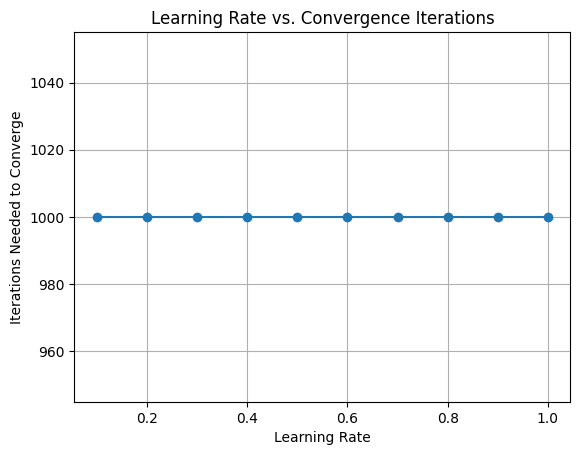

In [18]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize lists to store the number of iterations for each learning rate
iterations_needed = []

# Maximum number of epochs
max_epochs = 1000

# Activation function (Bipolar Step)
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Function to train the perceptron and return the number of iterations needed to converge
def train_perceptron(learning_rate):
    W_temp = np.copy(W)
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            net_input = np.dot(X[i], W_temp)
            y_pred = bipolar_step_function(net_input)
            error = y[i] - y_pred
            delta = learning_rate * error
            W_temp += delta * X[i]
            total_error += error ** 2
        if total_error == 0:
            return epoch + 1  # Return the number of iterations if converged
    return max_epochs  # Return the maximum number of iterations if not converged

# Iterate over learning rates and train perceptron
for lr in learning_rates:
    iterations = train_perceptron(lr)
    iterations_needed.append(iterations)

# Plot learning rates vs. iterations needed
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed to Converge')
plt.title('Learning Rate vs. Convergence Iterations')
plt.grid(True)
plt.show()

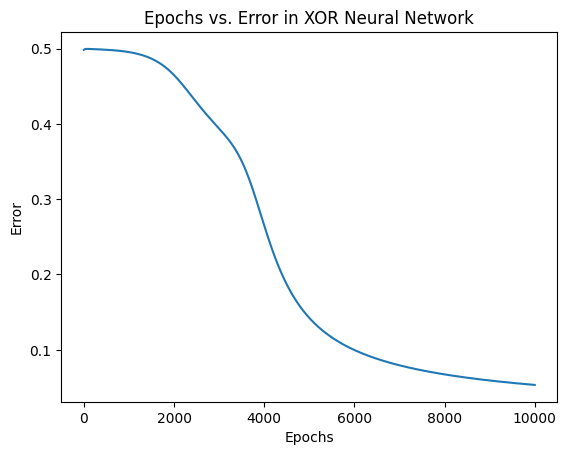

Final Output after Training:
[[0.05568825]
 [0.94878961]
 [0.94872544]
 [0.05523735]]


In [19]:

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and biases for the hidden and output layers
hidden_weights = np.random.rand(2, 2)
hidden_bias = np.zeros((1, 2))
output_weights = np.random.rand(2, 1)
output_bias = np.zeros((1, 1))

# Learning rate
alpha = 0.1

# Number of epochs
max_epochs = 10000

# Initialize lists to store error and epoch values for plotting
error_values = []
epoch_values = []

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
for epoch in range(max_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = y.reshape(-1, 1) - output_layer_output
    total_error = np.mean(np.abs(error))
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Update weights and biases
    output_weights += hidden_layer_output.T.dot(d_output) * alpha
    output_bias += np.sum(d_output, axis=0, keepdims=True) * alpha
    hidden_weights += X.T.dot(d_hidden_layer) * alpha
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * alpha
    
    # Store error and epoch values for plotting
    error_values.append(total_error)
    epoch_values.append(epoch)

    # Check for convergence
    if total_error == 0:
        break

# Plot epochs vs. error
plt.plot(epoch_values, error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error in XOR Neural Network')
plt.show()

# Print the final output after training
print("Final Output after Training:")
print(output_layer_output)


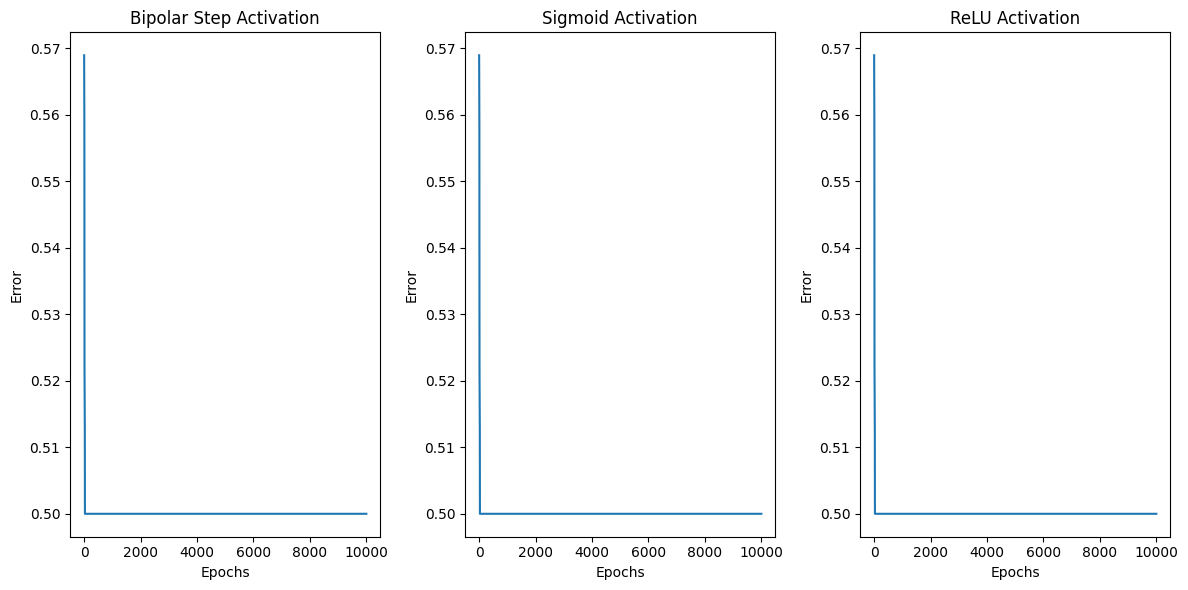

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights and biases for the hidden and output layers
hidden_weights = np.random.rand(2, 2)
hidden_bias = np.zeros((1, 2))
output_weights = np.random.rand(2, 1)
output_bias = np.zeros((1, 1))

# Learning rate
alpha = 0.1

# Number of epochs
max_epochs = 10000

# Initialize lists to store error and epoch values for plotting
error_values_bipolar = []
epoch_values_bipolar = []

error_values_sigmoid = []
epoch_values_sigmoid = []

error_values_relu = []
epoch_values_relu = []

# Bipolar Step activation function
def bipolar_step(x):
    return 1 if x >= 0 else -1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activation function
def relu(x):
    return max(0, x)

# Training loop
for epoch in range(max_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
    
    # Activation functions for hidden layer
    hidden_layer_output_bipolar = np.vectorize(bipolar_step)(hidden_layer_input)
    hidden_layer_output_sigmoid = sigmoid(hidden_layer_input)
    hidden_layer_output_relu = np.vectorize(relu)(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output_relu, output_weights) + output_bias
    output_layer_output = sigmoid(output_layer_input)
    
    # Calculate error
    error = y.reshape(-1, 1) - output_layer_output
    total_error = np.mean(np.abs(error))
    
    # Backpropagation
    d_output = error * (output_layer_output * (1 - output_layer_output))
    error_hidden_layer = d_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * (hidden_layer_output_relu > 0)

    # Update weights and biases
    output_weights += hidden_layer_output_relu.T.dot(d_output) * alpha
    output_bias += np.sum(d_output, axis=0, keepdims=True) * alpha
    hidden_weights += X.T.dot(d_hidden_layer) * alpha
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * alpha
    
    # Store error and epoch values for each activation function
    error_values_bipolar.append(total_error)
    epoch_values_bipolar.append(epoch)

    error_values_sigmoid.append(total_error)
    epoch_values_sigmoid.append(epoch)

    error_values_relu.append(total_error)
    epoch_values_relu.append(epoch)

    # Check for convergence for each activation function
    if total_error == 0:
        break

# Plot epochs vs. error for each activation function
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(epoch_values_bipolar, error_values_bipolar)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Bipolar Step Activation')

plt.subplot(132)
plt.plot(epoch_values_sigmoid, error_values_sigmoid)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Sigmoid Activation')

plt.subplot(133)
plt.plot(epoch_values_relu, error_values_relu)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('ReLU Activation')

plt.tight_layout()
plt.show()


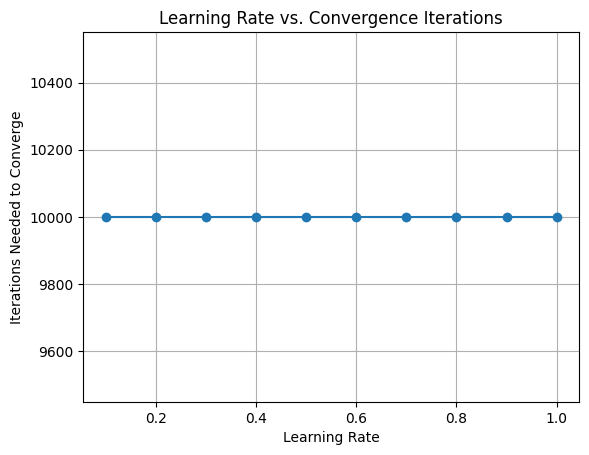

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Initialize weights for the hidden and output layers (common for all learning rates)
hidden_weights = np.random.rand(2, 2)
output_weights = np.random.rand(2, 1)

# Maximum number of epochs
max_epochs = 10000

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to train the perceptron and return the number of iterations needed to converge
def train_perceptron(learning_rate):
    # Initialize biases for the hidden and output layers
    hidden_bias = np.zeros((1, 2))
    output_bias = np.zeros((1, 1))
    
    hidden_weights_temp = np.copy(hidden_weights)
    output_weights_temp = np.copy(output_weights)
    
    for epoch in range(max_epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights_temp) + hidden_bias
        
        # Activation functions for hidden layer
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, output_weights_temp) + output_bias
        output_layer_output = sigmoid(output_layer_input)
        
        # Calculate error
        error = y.reshape(-1, 1) - output_layer_output
        total_error = np.mean(np.abs(error))
        
        # Backpropagation
        d_output = error * (output_layer_output * (1 - output_layer_output))
        error_hidden_layer = d_output.dot(output_weights_temp.T)
        d_hidden_layer = error_hidden_layer * (hidden_layer_output * (1 - hidden_layer_output))

        # Update weights
        output_weights_temp += hidden_layer_output.T.dot(d_output) * learning_rate
        output_bias += np.sum(d_output, axis=0, keepdims=True) * learning_rate
        hidden_weights_temp += X.T.dot(d_hidden_layer) * learning_rate
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
        
        # Check for convergence
        if total_error == 0:
            return epoch + 1  # Return the number of iterations if converged
    return max_epochs  # Return the maximum number of iterations if not converged

# Learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize lists to store the number of iterations for each learning rate
iterations_needed = []

# Iterate over learning rates and train perceptron
for lr in learning_rates:
    iterations = train_perceptron(lr)
    iterations_needed.append(iterations)

# Plot learning rates vs. iterations needed
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed to Converge')
plt.title('Learning Rate vs. Convergence Iterations')
plt.grid(True)
plt.show()


In [26]:
df = pd.read_excel(r'data_convert.xlsx')
df

,Customer,Candies\n( # ),Mangoes\n( Kg ),Milk Packets\n( # ),Payment\n( Rs ),High Value\nTx ?
0,NaN,NaN,NaN,NaN,NaN,NaN
1,C_1,20.0,6.0,2.0,386.0,Yes
2,C_2,16.0,3.0,6.0,289.0,Yes
3,C_3,27.0,6.0,2.0,393.0,Yes
4,C_4,19.0,1.0,2.0,110.0,No
5,C_5,24.0,4.0,2.0,280.0,Yes
6,C_6,22.0,1.0,25.0,167.0,No
7,C_7,15.0,4.0,2.0,271.0,Yes
8,C 8,18.0,4.0,2.0,274.0,Yes
9,C_9,21.0,1.0,4.0,148.0,No


In [30]:
df.dropna(how ="any",inplace=True)

In [31]:
df

,Customer,Candies\n( # ),Mangoes\n( Kg ),Milk Packets\n( # ),Payment\n( Rs ),High Value\nTx ?
1,C_1,20.0,6.0,2.0,386.0,Yes
2,C_2,16.0,3.0,6.0,289.0,Yes
3,C_3,27.0,6.0,2.0,393.0,Yes
4,C_4,19.0,1.0,2.0,110.0,No
5,C_5,24.0,4.0,2.0,280.0,Yes
6,C_6,22.0,1.0,25.0,167.0,No
7,C_7,15.0,4.0,2.0,271.0,Yes
8,C 8,18.0,4.0,2.0,274.0,Yes
9,C_9,21.0,1.0,4.0,148.0,No
10,C 10,16.0,2.0,4.0,198.0,No


In [46]:
import pandas as pd
import numpy as np

# Load the dataset from Excel (replace 'your_dataset.xlsx' with the actual file name)
data = pd.read_excel(r'data_convert.xlsx')

# One-hot encode categorical columns in the dataset
data = pd.get_dummies(data, 'Customer')
data
# Extract features (X) and labels (y)


,Candies\n( # ),Mangoes\n( Kg ),Milk Packets\n( # ),Payment\n( Rs ),Customer_C 10,Customer_C 8,Customer_C_1,Customer_C_2,Customer_C_3,Customer_C_4,Customer_C_5,Customer_C_6,Customer_C_7,Customer_C_9,Customer_No,Customer_Yes
0,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False
1,20.0,6.0,2.0,386.0,False,False,True,False,False,False,False,False,False,False,False,True
2,16.0,3.0,6.0,289.0,False,False,False,True,False,False,False,False,False,False,False,True
3,27.0,6.0,2.0,393.0,False,False,False,False,True,False,False,False,False,False,False,True
4,19.0,1.0,2.0,110.0,False,False,False,False,False,True,False,False,False,False,True,False
5,24.0,4.0,2.0,280.0,False,False,False,False,False,False,True,False,False,False,False,True
6,22.0,1.0,25.0,167.0,False,False,False,False,False,False,False,True,False,False,True,False
7,15.0,4.0,2.0,271.0,False,False,False,False,False,False,False,False,True,False,False,True
8,18.0,4.0,2.0,274.0,False,True,False,False,False,False,False,False,False,False,False,True
9,21.0,1.0,4.0,148.0,False,False,False,False,False,False,False,False,False,True,True,False


In [ ]:
X = data.drop('Customer_C_1', axis=1)  # Replace 'label_column' with the actual label column name
y = data['Customer_C_1']

# Check the data types of X and y
print("Type of X:", type(X))
print("Type of y:", type(y))

# Split the dataset into training and testing sets (adjust the ratio as needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
input_dim = X_train.shape[1]
weights = np.random.rand(input_dim)
bias = np.random.rand()

# Learning rate
learning_rate = 0.01

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
num_epochs = 1000  # Adjust as needed
for epoch in range(num_epochs):
    # Forward propagation
    weighted_sum = np.dot(X_train, weights) + bias
    predictions = sigmoid(weighted_sum)

    # Calculate the error
    error = y_train - predictions

    # Backpropagation
    d_weights = np.dot(X_train.T, error * sigmoid_derivative(predictions))
    d_bias = np.sum(error * sigmoid_derivative(predictions))

    # Update weights and bias
    weights += learning_rate * d_weights
    bias += learning_rate * d_bias

# Predict on the test dataset
test_weighted_sum = np.dot(X_test, weights) + bias
test_predictions = sigmoid(test_weighted_sum)

# Convert the test predictions to binary values (e.g., 0 or 1) based on a threshold
threshold = 0.5  # Adjust as needed
predicted_labels = (test_predictions > threshold).astype(int)

# Calculate prediction accuracy on the test dataset
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)


In [ ]:
import numpy as np

# Load and preprocess your dataset as described previously, including one-hot encoding if needed

# Add a bias term (constant feature) to the input features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Compute the pseudo-inverse of the design matrix
X_pseudo_inv = np.linalg.pinv(X_train)

# Calculate the weight vector using matrix pseudo-inverse
weights_pseudo_inv = np.dot(X_pseudo_inv, y_train)

# Predict on the test dataset
test_predictions_pseudo_inv = np.dot(X_test, weights_pseudo_inv)

# Convert the test predictions to binary values (e.g., 0 or 1) based on a threshold
threshold = 0.5  # Adjust as needed
predicted_labels_pseudo_inv = (test_predictions_pseudo_inv > threshold).astype(int)

# Calculate prediction accuracy on the test dataset
from sklearn.metrics import accuracy_score
accuracy_pseudo_inv = accuracy_score(y_test, predicted_labels_pseudo_inv)
print("Accuracy (Matrix Pseudo-Inverse):", accuracy_pseudo_inv)


In [49]:
import numpy as np

# Define the AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# Initialize weights and biases for the network
input_size = 2
hidden_size = 4
output_size = 1

# Use random initialization for weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Learning rate
learning_rate = 0.05

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the network with the AND gate inputs
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)

# Print the test results
print("AND Gate Test Outputs:")
print(test_output)


AND Gate Test Outputs:
[[0.00203824]
 [0.04486275]
 [0.04450334]
 [0.94175142]]


In [50]:
import numpy as np

# Define the XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases for the network
input_size = 2
hidden_size = 4
output_size = 1

# Use random initialization for weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Learning rate
learning_rate = 0.05

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the network with the XOR gate inputs
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)

# Print the test results
print("XOR Gate Test Outputs:")
print(np.round(test_output))


XOR Gate Test Outputs:
[[0.]
 [1.]
 [1.]
 [0.]]


In [51]:
import numpy as np

# Define the XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Initialize weights and biases for the network
input_size = 2
hidden_size = 4
output_size = 2

# Use random initialization for weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Learning rate
learning_rate = 0.05

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Test the network with the XOR gate inputs
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output = sigmoid(np.dot(sigmoid(np.dot(test_input, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)

# Print the test results
print("XOR Gate Test Outputs:")
print(np.round(test_output))


XOR Gate Test Outputs:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [52]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the AND gate training data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create an MLPClassifier for AND gate
clf_and = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000, random_state=42, learning_rate_init=0.05)

# Train the classifier
clf_and.fit(X_and, y_and)

# Test the classifier with AND gate inputs
test_input_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output_and = clf_and.predict(test_input_and)

# Print the test results
print("AND Gate Test Outputs:")
print(test_output_and)


AND Gate Test Outputs:
[0 0 0 1]


In [53]:
# Define the XOR gate training data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for XOR gate
clf_xor = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', max_iter=10000, random_state=42, learning_rate_init=0.05)

# Train the classifier
clf_xor.fit(X_xor, y_xor)

# Test the classifier with XOR gate inputs
test_input_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_output_xor = clf_xor.predict(test_input_xor)

# Print the test results
print("XOR Gate Test Outputs:")
print(test_output_xor)


XOR Gate Test Outputs:
[0 1 1 0]


In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and preprocess your dataset, separating X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier with desired hyperparameters
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, learning_rate_init=0.001, random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Fine-tune hyperparameters and repeat the process as needed


Accuracy: 0.0
